In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SummaryofWeather.csv", low_memory=False)

In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [5]:
len(df.columns)

31

In [6]:
# We create function for delet a null columns

def drop_null_columns(df,threshold=0.70):  
    for column in df.columns:
        if df[column].isnull().sum() > (len(df) * threshold):
            df.drop(column,axis=1,inplace=True)

In [7]:
drop_null_columns(df)

In [8]:
len(df.columns)

15

In [9]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0


In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df["Year"] = df["Date"].dt.year 

In [12]:
df.drop("YR",axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117877 non-null  object        
 7   MO        119040 non-null  int64         
 8   DA        119040 non-null  int64         
 9   PRCP      117108 non-null  object        
 10  MAX       118566 non-null  float64       
 11  MIN       118572 non-null  float64       
 12  MEA       118542 non-null  float64       
 13  SNF       117877 non-null  object        
 14  Year      119040 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(3), object(4)
memory usage: 13.2+ M

In [14]:
#We need to use date and time information, but we cannot directly use it as a date object. 
#Therefore, we apply a trigonometric transformation to represent it in a cyclical way. 

df['Month_sin'] = np.sin(2 * np.pi * df['MO'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['MO'] / 12)

df['DayOfYear'] = df['Date'].dt.dayofyear
df['Day_sin'] = np.sin(2 * np.pi * df['DayOfYear'] / 365)
df['Day_cos'] = np.cos(2 * np.pi * df['DayOfYear'] / 365)

In [15]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,MO,DA,PRCP,MAX,MIN,MEA,SNF,Year,Month_sin,Month_cos,DayOfYear,Day_sin,Day_cos
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0,7,1,0.04,78.0,72.0,75.0,0,1942,-0.5,-0.866025,182,0.008607,-0.999963
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0,7,2,0,84.0,71.0,78.0,0,1942,-0.5,-0.866025,183,-0.008607,-0.999963
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0,7,3,0.1,79.0,72.0,76.0,0,1942,-0.5,-0.866025,184,-0.025818,-0.999667
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0,7,4,0.1,80.0,72.0,76.0,0,1942,-0.5,-0.866025,185,-0.043022,-0.999074
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0,7,5,0,80.0,71.0,76.0,0,1942,-0.5,-0.866025,186,-0.060213,-0.998186


In [16]:
df.drop(["Date","MO","DA","Year","MAX","MIN","MinTemp","DayOfYear","MEA"],axis=1,inplace=True)

In [17]:
df.head()

,STA,Precip,MaxTemp,MeanTemp,Snowfall,PRCP,SNF,Month_sin,Month_cos,Day_sin,Day_cos
0,10001,1.016,25.555556,23.888889,0,0.04,0,-0.5,-0.866025,0.008607,-0.999963
1,10001,0,28.888889,25.555556,0,0,0,-0.5,-0.866025,-0.008607,-0.999963
2,10001,2.54,26.111111,24.444444,0,0.1,0,-0.5,-0.866025,-0.025818,-0.999667
3,10001,2.54,26.666667,24.444444,0,0.1,0,-0.5,-0.866025,-0.043022,-0.999074
4,10001,0,26.666667,24.444444,0,0,0,-0.5,-0.866025,-0.060213,-0.998186


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STA        119040 non-null  int64  
 1   Precip     119040 non-null  object 
 2   MaxTemp    119040 non-null  float64
 3   MeanTemp   119040 non-null  float64
 4   Snowfall   117877 non-null  object 
 5   PRCP       117108 non-null  object 
 6   SNF        117877 non-null  object 
 7   Month_sin  119040 non-null  float64
 8   Month_cos  119040 non-null  float64
 9   Day_sin    119040 non-null  float64
 10  Day_cos    119040 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 10.0+ MB


In [19]:
for column in df.columns:
   df.dropna(subset=[column],inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116174 entries, 0 to 119039
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STA        116174 non-null  int64  
 1   Precip     116174 non-null  object 
 2   MaxTemp    116174 non-null  float64
 3   MeanTemp   116174 non-null  float64
 4   Snowfall   116174 non-null  object 
 5   PRCP       116174 non-null  object 
 6   SNF        116174 non-null  object 
 7   Month_sin  116174 non-null  float64
 8   Month_cos  116174 non-null  float64
 9   Day_sin    116174 non-null  float64
 10  Day_cos    116174 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 10.6+ MB


In [21]:
df["Precip"].unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

In [22]:
df["Precip"] = df["Precip"].replace("T",0)

In [23]:
df["Snowfall"] = df["Snowfall"].replace("#VALUE!",np.nan)

In [24]:
df["Snowfall"].unique()

array(['0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16', '7.62',
       '20.32', '15.24', '17.78', '12.7', '25.4', '27.94', '43.18',
       '38.1', '45.72', '53.34', '58.42', '66.04', '76.2', '81.28',
       '73.66', '63.5', '50.8', '48.26', '60.96', '55.88', '35.56',
       '78.74', '40.64', '86.36', '83.82', '68.58', nan], dtype=object)

In [25]:
df["PRCP"] = df["PRCP"].replace("T",0)

In [26]:
df["PRCP"].unique()

array(['0.04', '0', '0.1', 0, '0.14', '0.02', '0.01', '0.07', '0.13',
       '0.03', '0.22', '0.2', '0.08', '1.01', '1.58', '0.75', '0.94',
       '0.16', '0.48', '0.11', '1.31', '0.76', '1.88', '0.25', '0.12',
       '0.33', '0.4', '1.07', '1.2', '1.78', '0.42', '0.61', '2.27',
       '2.29', '0.45', '1.23', '0.7', '1.06', '1.05', '0.26', '0.21',
       '0.19', '0.3', '0.34', '0.31', '0.49', '3.58', '0.53', '0.47',
       '0.23', '0.17', '0.24', '0.36', '0.18', '0.39', '0.38', '0.06',
       '0.55', '0.68', '1.32', '0.05', '0.54', '0.32', '0.88', '1.54',
       '1.42', '3.86', '0.15', '0.59', '3.08', '5.76', '0.58', '0.86',
       '4.76', '1.66', '0.92', '0.83', '1.77', '0.09', '1.97', '0.69',
       '2.01', '0.28', '1', '0.29', '0.64', '1.84', '0.35', '0.97',
       '0.46', '0.67', '5.7', '0.71', '2', '4.19', '1.44', '2.1', '1.37',
       '0.51', '1.04', '3.37', '1.87', '0.5', '0.44', '2.33', '1.33',
       '1.61', '1.11', '0.98', '0.57', '2.82', '4.02', '1.24', '1.43',
       '1.49'

In [27]:
df["SNF"] = df["SNF"].replace("T",np.nan)

In [28]:
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = pd.to_numeric(df[column])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116174 entries, 0 to 119039
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STA        116174 non-null  int64  
 1   Precip     116174 non-null  float64
 2   MaxTemp    116174 non-null  float64
 3   MeanTemp   116174 non-null  float64
 4   Snowfall   116130 non-null  float64
 5   PRCP       116174 non-null  float64
 6   SNF        116130 non-null  float64
 7   Month_sin  116174 non-null  float64
 8   Month_cos  116174 non-null  float64
 9   Day_sin    116174 non-null  float64
 10  Day_cos    116174 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 10.6 MB


In [30]:
correlation = df['PRCP'].corr(df['Precip'])

In [31]:
correlation

np.float64(1.0)

In [32]:
 df['SNF'].corr(df['Snowfall'])

np.float64(1.0)

In [33]:
df.head()

,STA,Precip,MaxTemp,MeanTemp,Snowfall,PRCP,SNF,Month_sin,Month_cos,Day_sin,Day_cos
0,10001,1.016,25.555556,23.888889,0.0,0.04,0.0,-0.5,-0.866025,0.008607,-0.999963
1,10001,0.000,28.888889,25.555556,0.0,0.00,0.0,-0.5,-0.866025,-0.008607,-0.999963
2,10001,2.540,26.111111,24.444444,0.0,0.10,0.0,-0.5,-0.866025,-0.025818,-0.999667
3,10001,2.540,26.666667,24.444444,0.0,0.10,0.0,-0.5,-0.866025,-0.043022,-0.999074
4,10001,0.000,26.666667,24.444444,0.0,0.00,0.0,-0.5,-0.866025,-0.060213,-0.998186


In [34]:
print("PRCP stats:")
print(df['PRCP'].describe())
print("\nPrecip stats:")
print(df['Precip'].describe())

# 2. Korelasyonu kontrol et
correlation = df['PRCP'].corr(df['Precip'])
print(f"\nPRCP-Precip korelasyonu: {correlation}")

# 3. Target ile korelasyonları
target_corr_prcp = df['PRCP'].corr(df['MeanTemp'])
target_corr_precip = df['Precip'].corr(df['MeanTemp'])
print(f"PRCP-MeanTemp korelasyonu: {target_corr_prcp}")
print(f"Precip-MeanTemp korelasyonu: {target_corr_precip}")

PRCP stats:
count    116174.000000
mean          0.129470
std           0.429576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.040000
max          12.100000
Name: PRCP, dtype: float64

Precip stats:
count    116174.000000
mean          3.288536
std          10.911231
min           0.000000
25%           0.000000
50%           0.000000
75%           1.016000
max         307.340000
Name: Precip, dtype: float64

PRCP-Precip korelasyonu: 1.0
PRCP-MeanTemp korelasyonu: 0.043446065960815516
Precip-MeanTemp korelasyonu: 0.0434460659608155


In [35]:
df.drop(["PRCP","SNF"],inplace=True,axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116174 entries, 0 to 119039
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STA        116174 non-null  int64  
 1   Precip     116174 non-null  float64
 2   MaxTemp    116174 non-null  float64
 3   MeanTemp   116174 non-null  float64
 4   Snowfall   116130 non-null  float64
 5   Month_sin  116174 non-null  float64
 6   Month_cos  116174 non-null  float64
 7   Day_sin    116174 non-null  float64
 8   Day_cos    116174 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 8.9 MB


In [37]:
df["Snowfall"] = df["Snowfall"].fillna(df["Snowfall"].mean())

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116174 entries, 0 to 119039
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STA        116174 non-null  int64  
 1   Precip     116174 non-null  float64
 2   MaxTemp    116174 non-null  float64
 3   MeanTemp   116174 non-null  float64
 4   Snowfall   116174 non-null  float64
 5   Month_sin  116174 non-null  float64
 6   Month_cos  116174 non-null  float64
 7   Day_sin    116174 non-null  float64
 8   Day_cos    116174 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 8.9 MB


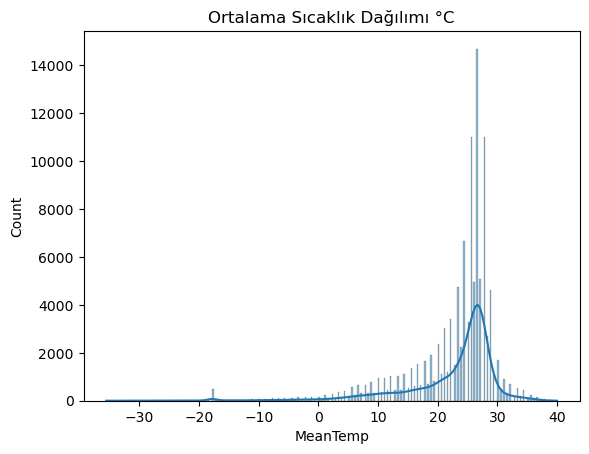

In [39]:
sns.histplot(df["MeanTemp"],kde=True)
plt.title("Ortalama Sıcaklık Dağılımı °C")
plt.show()

In [40]:
df.corr()

,STA,Precip,MaxTemp,MeanTemp,Snowfall,Month_sin,Month_cos,Day_sin,Day_cos
STA,1.000000,0.013028,0.080677,0.067622,-0.058823,0.007380,-0.011378,0.010155,-0.009252
Precip,0.013028,1.000000,-0.001494,0.043446,-0.011603,-0.056970,-0.034334,-0.047120,-0.049195
MaxTemp,0.080677,-0.001494,1.000000,0.967658,-0.339872,-0.102622,-0.199682,-0.048223,-0.222133
MeanTemp,0.067622,0.043446,0.967658,1.000000,-0.341086,-0.132497,-0.207416,-0.075140,-0.237630
Snowfall,-0.058823,-0.011603,-0.339872,-0.341086,1.000000,0.071801,0.046579,0.058113,0.064814
Month_sin,0.007380,-0.056970,-0.102622,-0.132497,0.071801,1.000000,-0.017056,0.954797,0.237238
Month_cos,-0.011378,-0.034334,-0.199682,-0.207416,0.046579,-0.017056,1.000000,-0.271799,0.955603
Day_sin,0.010155,-0.047120,-0.048223,-0.075140,0.058113,0.954797,-0.271799,1.000000,-0.018260
Day_cos,-0.009252,-0.049195,-0.222133,-0.237630,0.064814,0.237238,0.955603,-0.018260,1.000000


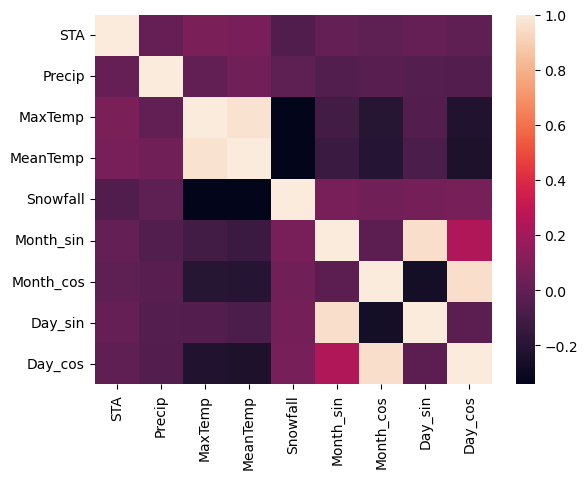

In [41]:
sns.heatmap(df.corr())
plt.show()

In [42]:
#sns.pairplot(df)
#plt.show()

In [43]:
df.drop("STA",axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116174 entries, 0 to 119039
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Precip     116174 non-null  float64
 1   MaxTemp    116174 non-null  float64
 2   MeanTemp   116174 non-null  float64
 3   Snowfall   116174 non-null  float64
 4   Month_sin  116174 non-null  float64
 5   Month_cos  116174 non-null  float64
 6   Day_sin    116174 non-null  float64
 7   Day_cos    116174 non-null  float64
dtypes: float64(8)
memory usage: 8.0 MB


In [45]:
# dependent & independent features
X = df.drop("MeanTemp",axis=1)
y = df["MeanTemp"]

In [46]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae: 1.5181270841059076
mse: 3.825542059626959
score: 0.9403658339734199


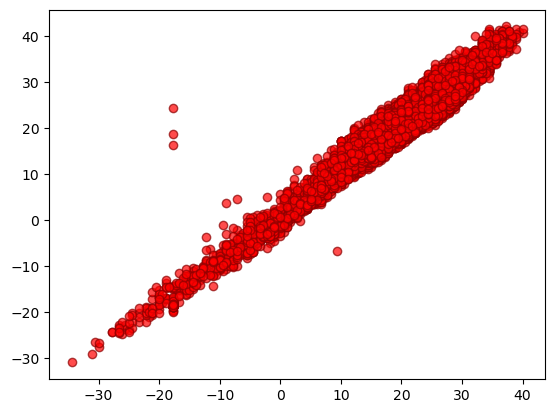

In [54]:
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)


plt.scatter(y_test, y_pred, color="red", edgecolors="darkred", alpha=0.7)
plt.show()

mae: 1.7643075552843395
mse: 5.010067722829284
score: 0.9219009474393949


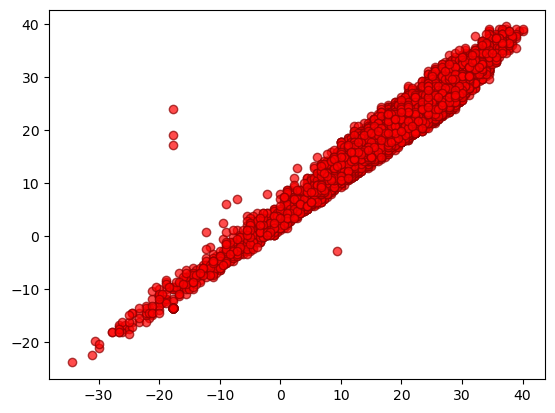

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)

plt.scatter(y_test, y_pred, color="red", edgecolors="darkred", alpha=0.7)
plt.show()

mae: 1.5181271120389208
mse: 3.8255396458606232
score: 0.9403658716002294


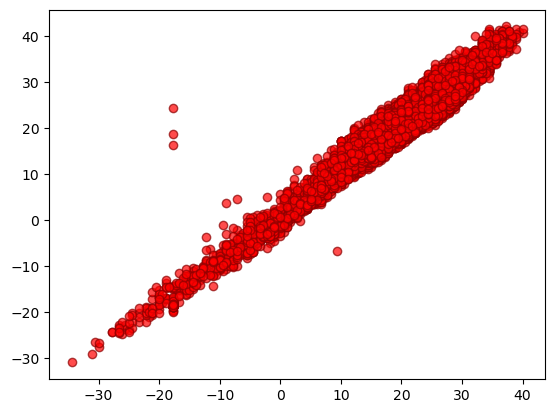

In [56]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)


plt.scatter(y_test, y_pred, color="red", edgecolors="darkred", alpha=0.7)
plt.show()

mae: 2.611323539405973
mse: 12.194188774922262
score: 0.809911832982413


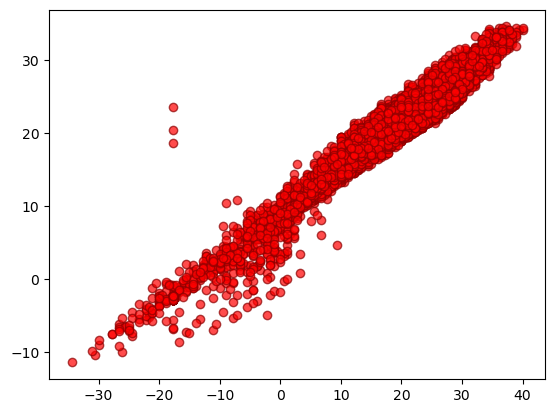

In [57]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)
print("score:",score)


plt.scatter(y_test, y_pred, color="red", edgecolors="darkred", alpha=0.7)
plt.show()